In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data, target = load_diabetes(return_X_y=True)

In [3]:
cols = load_diabetes().feature_names

In [4]:
cols

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
df = pd.DataFrame(data, columns=cols)
df['target'] = target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

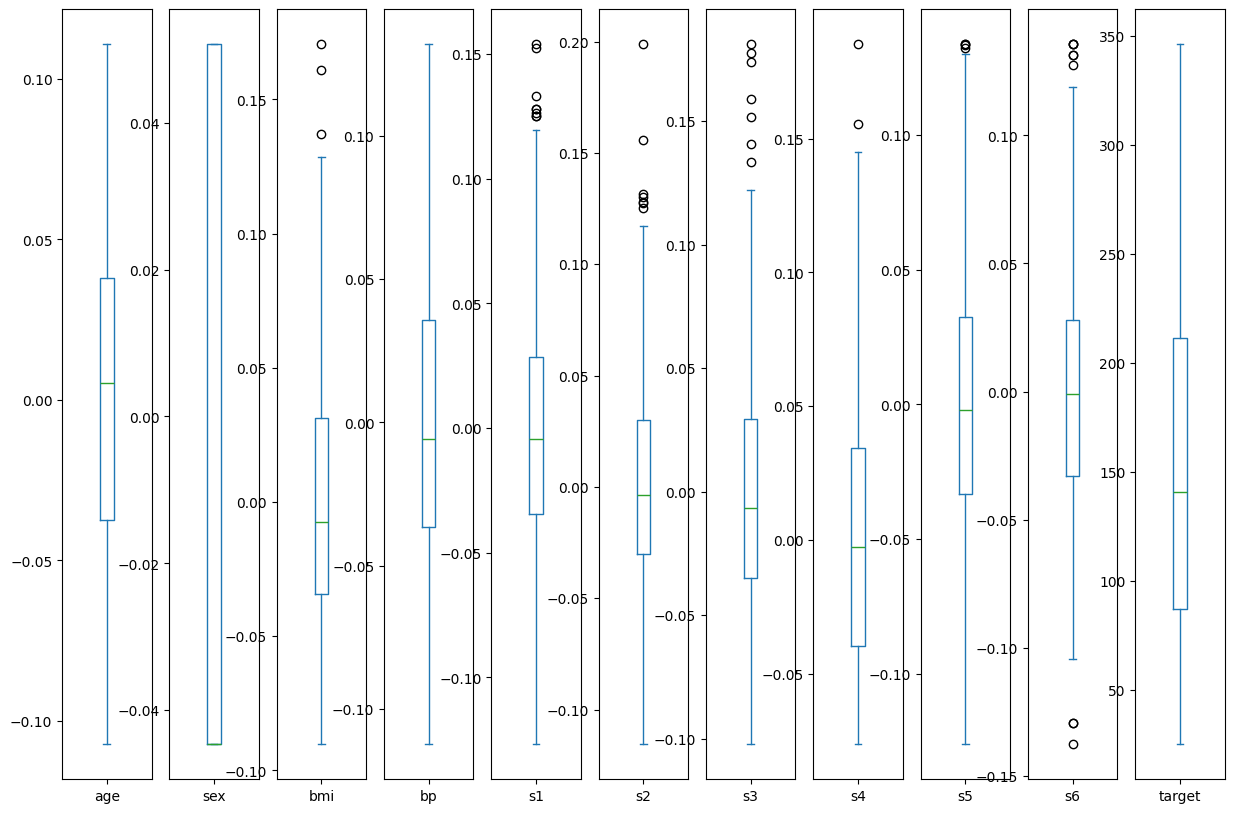

In [7]:
#plot boxplot to check for outliers
df.plot(kind='box', figsize=(15,10), subplots=True);

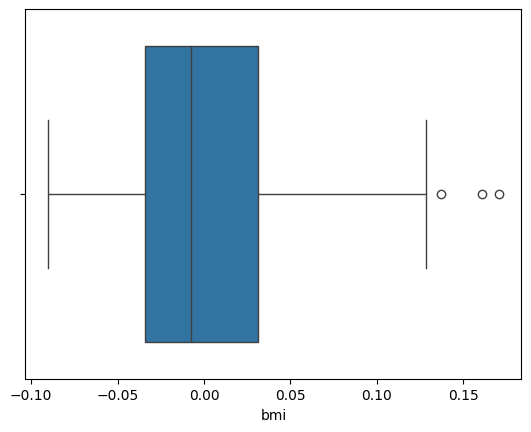

In [8]:
sns.boxplot(data=df, x = 'bmi');

In [9]:
#calculate q1, q3 and IQR
q1, q3 = df['bmi'].quantile(0.25), df['bmi'].quantile(0.75)
IQR = q3 - q1
IQR

np.float64(0.06547708348825859)

In [10]:
#calculate cutoff point for bmi on the higer side
high_outlier = q3 + (1.5*IQR)
high_outlier

np.float64(0.1294636406639386)

In [11]:
#condition to filter outliers
df_new = df[df['bmi'] < high_outlier]

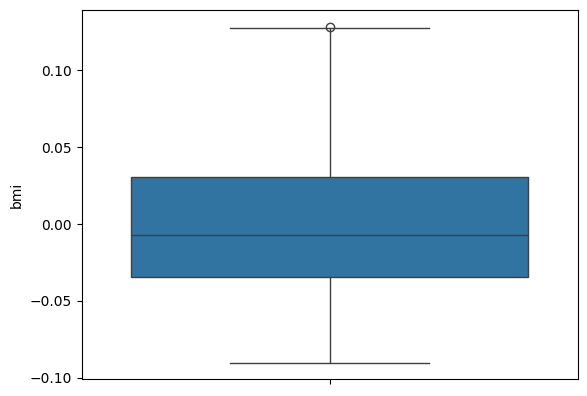

In [12]:
sns.boxplot(df_new['bmi']);